## Modelo de regresión logística para variable etiqueta: *carga_aprobada*

In [1]:
library(MASS)
library(dplyr)
library(caret)
library(pROC)
library(MLmetrics)

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following object is masked from 'package:MASS':

    select

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'caret' was built under R version 3.6.3"Loading required package: lattice
Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message in as.POSIXlt.POSIXct(Sys.time()):
"unable to identify current timezone 'H':
please set environment variable 'TZ'"Warning message:
"package 'pROC' was built under R version 3.6.3"Type 'citation("pROC")' for a citation.

Attaching package: 'pROC'

The following objects are masked from 'package:stats':

    cov, smooth, var

Warning message:
"package 'MLmetrics' was built under R version 3.6.3"
Attaching package: 'MLmetrics'

The following objects are

Las siguientes 2 celdas son solo para ver la proporción de las clases en el conjunto completo de cargas académicas.

In [3]:
dat <- read.csv("../Data/estudiantes.csv") #datos completos
nrow(dat)

[1] 23562

In [4]:
prop.table(table(dat$carga_aprobada))


        0         1 
0.4059503 0.5940497 

* Función para gráficar ROC y calcular métricas (Exactitud y Score F1)

In [5]:
test_model <- function(model, test){
    prob <- model %>% predict(test, type = "response")
    test$predicted <- ifelse(prob > 0.5, 1, 0)
    cat("Accuracy: ", mean(test$predicted == test$carga_aprobada),"\n")
    cat("F1 Score: ", F1_Score(y_pred = test$predicted, y_true = test$carga_aprobada, positive = "1"),"\n")
    plot.roc(roc(test$carga_aprobada, prob), print.auc=T, print.thres = "best", col="blue")
    
    confusionMatrix(table(test$predicted, test$carga_aprobada), positive = '1')
  
}

### Cargar conjunto de entrenamiento

(Datos que corresponden a los años 2016 y 2018).

In [6]:
train <- read.csv("../Data/train.csv")

nrow(train)
length(names(train))

[1] 11422

[1] 22

### Cargar conjunto de prueba

(Datos que corresponden a los años 2017 y 2019).

In [7]:
test <- read.csv("../Data/test.csv")

nrow(test)
length(names(test))

[1] 12140

[1] 22

In [8]:
prop.table(table(train$carga_aprobada)) 
prop.table(table(test$carga_aprobada)) 


        0         1 
0.4293469 0.5706531 


        0         1 
0.3839374 0.6160626 

## Modelo inicial


Call:
glm(formula = carga_aprobada ~ ., family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4174  -1.0335   0.5602   0.9256   2.8591  

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)            -2.4941991  0.3422449  -7.288 3.15e-13 ***
tasa_rep_carga         -0.1150099  0.0062202 -18.490  < 2e-16 ***
ceneval_analitico      -0.0004648  0.0002980  -1.560 0.118854    
ceneval_matematico      0.0028481  0.0002847  10.005  < 2e-16 ***
ceneval_lengua          0.0011135  0.0003012   3.697 0.000218 ***
ceneval_esp             0.0011155  0.0002894   3.854 0.000116 ***
tasa_aprob_per_prev     0.6724165  0.0500161  13.444  < 2e-16 ***
asigMuchas             -0.0352432  0.0550945  -0.640 0.522376    
carrera_IA             -0.1144918  0.1009683  -1.134 0.256821    
carrera_IDeIO           0.5235888  0.1293135   4.049 5.14e-05 ***
carrera_ILyCS           0.1462399  0.1231475   1.188 0.235023    
car

Accuracy:  0.7052718 
F1 Score:  0.7633285 


Setting levels: control = 0, case = 1
Setting direction: controls < cases


Confusion Matrix and Statistics

   
       0    1
  0 2792 1709
  1 1869 5770
                                          
               Accuracy : 0.7053          
                 95% CI : (0.6971, 0.7134)
    No Information Rate : 0.6161          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.3729          
                                          
 Mcnemar's Test P-Value : 0.007857        
                                          
            Sensitivity : 0.7715          
            Specificity : 0.5990          
         Pos Pred Value : 0.7553          
         Neg Pred Value : 0.6203          
             Prevalence : 0.6161          
         Detection Rate : 0.4753          
   Detection Prevalence : 0.6292          
      Balanced Accuracy : 0.6853          
                                          
       'Positive' Class : 1               
                                          

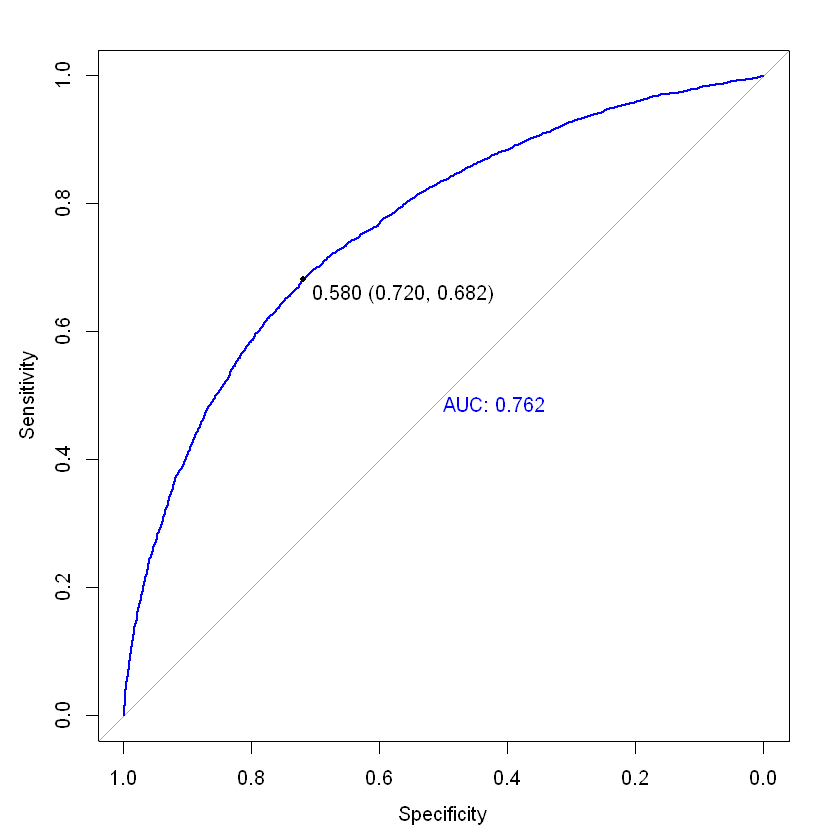

In [9]:
gpaModel <- glm(carga_aprobada ~ ., data = train, family = "binomial")
summary(gpaModel) # AIC: 13352
test_model(gpaModel, test) # Accuracy:  0.705, AUC: 0.762, F1 Score:  0.7633

## stepAIC

Para obtener el mejor modelo de Regresión Logística se emplea la función *stepAIC*.

In [10]:
mod_both <- stepAIC(gpaModel, direction = "both")
summary(mod_both) #AIC: 13344

Start:  AIC=13351.64
carga_aprobada ~ tasa_rep_carga + ceneval_analitico + ceneval_matematico + 
    ceneval_lengua + ceneval_esp + tasa_aprob_per_prev + asigMuchas + 
    carrera_IA + carrera_IDeIO + carrera_ILyCS + carrera_II + 
    carrera_IE + carrera_NI + carrera_TS + semestre_Otoño + complejidad_carga5 + 
    año_encurso + total_recursando + practicante + situacion_Condicionado + 
    situacion_Irregular

                         Df Deviance   AIC
- carrera_II              1    13308 13350
- practicante             1    13308 13350
- asigMuchas              1    13308 13350
- carrera_IE              1    13308 13350
- carrera_IA              1    13309 13351
- carrera_ILyCS           1    13309 13351
<none>                         13308 13352
- ceneval_analitico       1    13310 13352
- carrera_TS              1    13311 13353
- semestre_Otoño          1    13311 13353
- carrera_NI              1    13313 13355
- total_recursando        1    13317 13359
- situacion_Condicionado  


Call:
glm(formula = carga_aprobada ~ tasa_rep_carga + ceneval_analitico + 
    ceneval_matematico + ceneval_lengua + ceneval_esp + tasa_aprob_per_prev + 
    carrera_IA + carrera_IDeIO + carrera_NI + carrera_TS + semestre_Otoño + 
    complejidad_carga5 + año_encurso + total_recursando + situacion_Condicionado + 
    situacion_Irregular, family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4116  -1.0324   0.5598   0.9251   2.8329  

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)            -2.5012823  0.3268858  -7.652 1.98e-14 ***
tasa_rep_carga         -0.1140857  0.0054924 -20.772  < 2e-16 ***
ceneval_analitico      -0.0004692  0.0002975  -1.577 0.114741    
ceneval_matematico      0.0028278  0.0002788  10.143  < 2e-16 ***
ceneval_lengua          0.0011274  0.0003009   3.747 0.000179 ***
ceneval_esp             0.0011194  0.0002892   3.870 0.000109 ***
tasa_aprob_per_prev     0.6735725

Accuracy:  0.7057661 
F1 Score:  0.7635377 


Setting levels: control = 0, case = 1
Setting direction: controls < cases


Confusion Matrix and Statistics

   
       0    1
  0 2801 1712
  1 1860 5767
                                          
               Accuracy : 0.7058          
                 95% CI : (0.6976, 0.7139)
    No Information Rate : 0.6161          
    P-Value [Acc > NIR] : < 2e-16         
                                          
                  Kappa : 0.3743          
                                          
 Mcnemar's Test P-Value : 0.01391         
                                          
            Sensitivity : 0.7711          
            Specificity : 0.6009          
         Pos Pred Value : 0.7561          
         Neg Pred Value : 0.6207          
             Prevalence : 0.6161          
         Detection Rate : 0.4750          
   Detection Prevalence : 0.6283          
      Balanced Accuracy : 0.6860          
                                          
       'Positive' Class : 1               
                                          

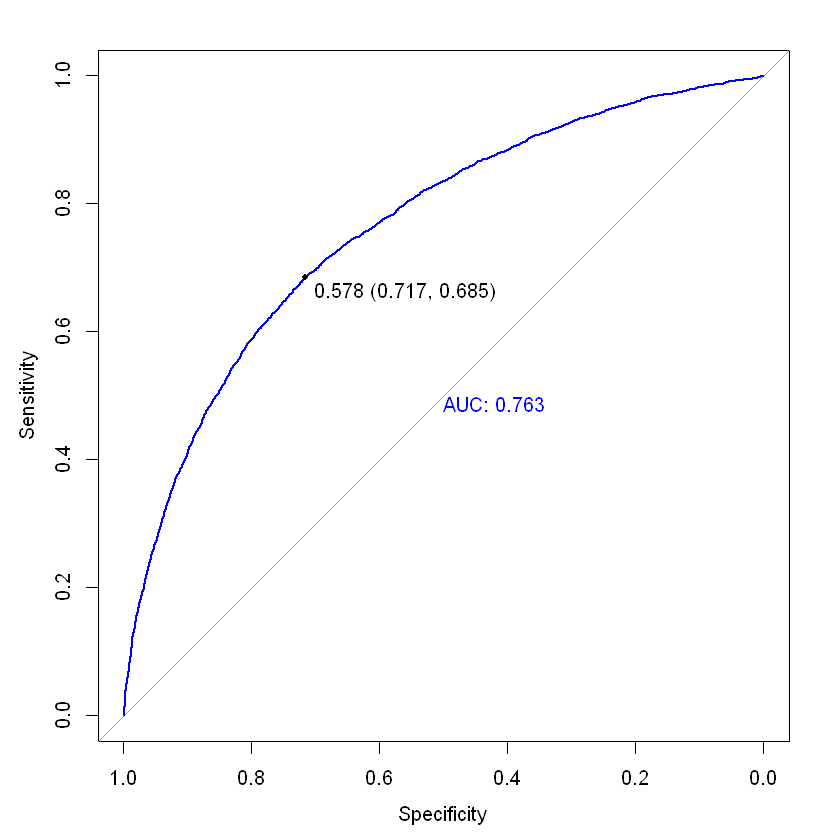

In [11]:
test_model(mod_both, test) # Accuracy: 0.7057661, AUC: 0.763, F1 Score:  0.7635377

## Resultados

|                | Modelo inicial  | Modelo stepAIC |
| :---:          | :---:           | :----:         |
|**AIC**         | 13,352          | 13,344         | 
|**Accuracy**    | 0.705           | 0.706          | 
|**AUC**         | 0.762           | 0.763          | 
|**Sensitivity** | 0.7715          | 0.7711         |
|**Specificity** | 0.5990          | 0.6009         |
|**F1-Score**    | 0.7633          | 0.7635         |

  


A pesar de tener un valor Akaike menor, el modelo resultante al usar la función stepAIC realmente no presenta diferencias en el resto de las métricas comparándolo con el modelo inicial.